***
# TP2 :
***

**Plan :**

1. Opérations sur la luminance :
    * Inversion (négatif)
    * Augmentation et diminution de luminance
    * Modifications de contraste (seuillage, rehaussement, egalisation, ...)
2. Opérations morphologiques et filtrage
    * Degradation d'images (Flou, Bruit)
    * Restoration d'images (De-bruitage, Netteté, Erosion, Dilatation)

***
# I. Opérations sur la de luminance:
***

Quelques notions et mots de vocabulaire:

- La **luminance** est une mesure physique qui fait référence à la quantité de lumière absolue émise par un objet (par unité de surface).
- La **luminosité** est une mesure perceptive qui fait référence à la brillance perçue d'un objet par un observateur humain.
- **Tons clairs et foncés** font référence à des couleurs ayant respectivement une luminance élevée et faible.

Illustration:  

![Histogramme](img/Illustrations/Histo.png)

Cette distinction est nécessaire car la luminosité perçue dépends d'autres paramètres de la scène que l'objet lui-même: la relation entre luminance et luminosité n'est pas linéaire.

#### **[Parenthèse]**

Cette non-linéarité peut se remarquer dans certaines illusions d'optique comme:  
<img src="img/illustrations/optical.png" width="400">

Notre cerveau fait constamment des hypothèses sur les propriétés de notre monde, et ces a priori viennent influencer notre perception du monde.  
Ici en l'occurence, ces a priori influencent la luminosité perçue alors que les deux dalles ont la même teinte et la même luminance : nos yeux reçoivent la même quantité de lumière des deux, mais le dessin est fait de de sorte à donner l'illusion que B est dans une zone d'ombre. Or, pour votre cerveau, la seule manière qu'un objet B dans une zone d'ombre soit aussi brillant qu'un objet A hors de l'ombre est que B doit naturellement être plus clair que A pour que, malgré l'ombre, il brille autant. Et il corrige l'information perçue selon cette hypothèse, résultant en l'illusion observée: A et B ont des couleurs différentes.

Ce genre d'hypothèses représentent un avantage évolutif et se révèleront être généralement utiles pour formuler des jugements perceptifs corrects rapidement, dans le monde réel. Certaines sont innées, d'autres apprises par l'expérience, mais elles sont omni-présentes dans notre perception du monde. Elles interviennent de manière inconsciente pour optimiser notre prise de décision. Cependant, ce genre d'heuristiques perceptives nous induisent parfois en erreur, notamment lorsqu'elles sont mises à mal intentionnellement par des illusions d'optiques faites spécifiquement pour les mettre à défaut. C'est à ce moment là qu'on les remarque, et qu'on se rend compte de leur nature irrépressible: on à beau savoir que l'on est trompés, on ne peut rien y changer.

> Percevoir est une bataille constante entre ce que l'on voit et ce que l'on s'attends à voir.

#### **[Fin de la parenthèse]**
  
  
Pour une image en **niveaux de gris**, l'information de luminance est directement donnée par la valeur de chaque pixel, qui représente une quantité de lumière transmise (on parle également d'intensité).

Pour une image **RGB**, l'information de luminance est "répartie" dans les trois canaux de couleur, et doit être extraire pour que l'image RGB soit convertie en image de niveaux de gris : on parle de séparer les valeurs de **luminance** et de **chrominance**. Les informations de luminance et chrominance (qui représente l'information de couleur pure, sans luminance) sont mélangées dans les canaux RGB, mais peuvent être séparées par des filtres spécifiques.  
<img src="img/illustrations/tri.png" width="600">

Par exemple, la fonction ```convert("L")``` de Pillow converti une image couleur en calculant la valeur de luminance (L) de chaque pixel par la fonction suivante : ```L = R * 299/1000 + G * 587/1000 + B * 114/1000```

**Remarque:** L'information de luminance de chaque pixel va influencer à quel point le pixel (de l'écran) qui affiche ce pixel (de l'image) sera illuminé, ce qui va influencer à son tour la luminosité perçue par la personne devant l'écran.

## I.1 Négatif d'une image
***

Une image négative est une image dont les couleurs ont été inversées par rapport à l'originale : 
- Le rouge devient cyan, le vert devient magenta, le bleu devient jaune et inversement.
- Les régions sombres deviennent claires, le noir devient blanc.  

Exemples:  
<img src="img/illustrations/neg.jpg" height="400">

**Remarque:** L'histogramme d'une image inversée sera l'inverse de celui de l'image d'origine.

### I.1.a Inversion d'images par opérations matricielles:

Pour une image en niveaux de gris (matrice 2D), chaque pixel n'a qu'une valeur, allant de 0 à 255.  
On va donc inverser cette valeur en changeant la valeur de chaque pixel en ```255 - valeur initiale``` : un pixel qui avait la valeur 255 (blanc) aura alors la valeur 0 (noir), et vice-versa.

Text(0.5,1,"Histogramme de l'image inversée")

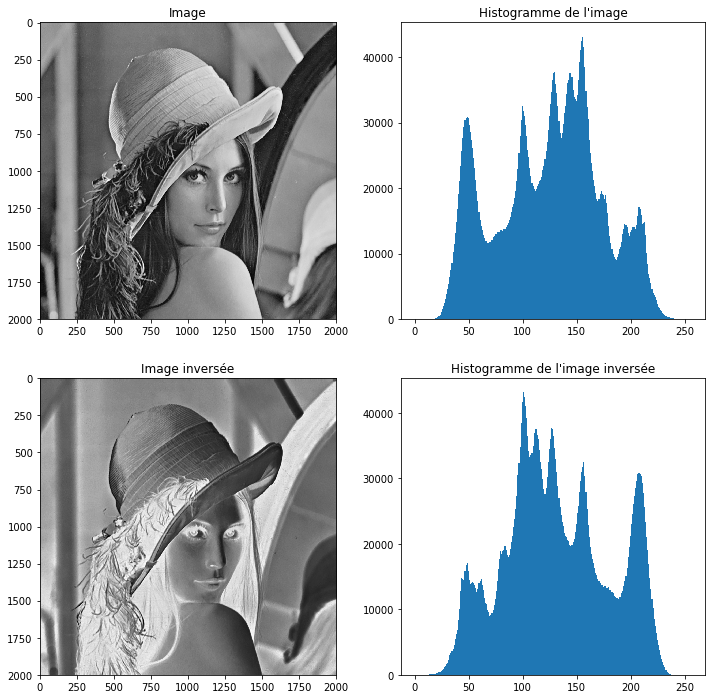

In [85]:
# Inversons une image en niveaux de gris

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = np.array(Image.open('img/lena.jpg').convert("L"))

# On inverse l'image
imgInv = 255 - img

# Affichons l'image d'origine, son inverse, et leurs histogrammes

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2,2,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(2,2,2)
plt.hist(img.ravel(), 256, [0,256])
ax.set_title("Histogramme de l'image")

ax = fig.add_subplot(2,2,3)
plt.imshow(imgInv, "gray")
ax.set_title("Image inversée")
ax = fig.add_subplot(2,2,4)
plt.hist(imgInv.ravel(), 256, [0,256])
ax.set_title("Histogramme de l'image inversée")

### I.1.b Inversion d'image via des méthodes spécifiques (Pillow):

#### En niveaux de gris:

Text(0.5,1,"Histogramme de l'image inversée")

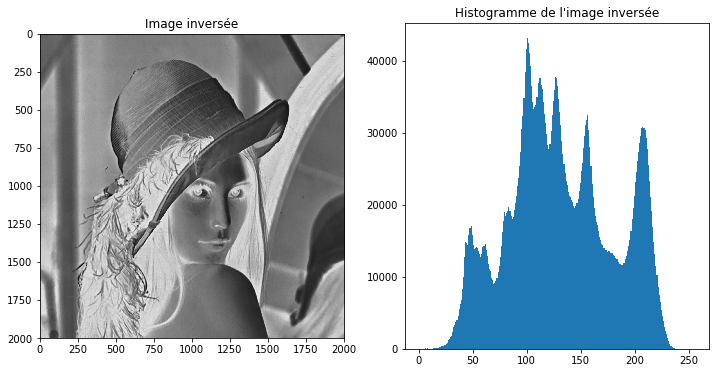

In [86]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg').convert("L")

# On inverse l'image
inverted_image = ImageOps.invert(img)

# Affichons le résultat

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1,2,1)
plt.imshow(inverted_image, "gray")
ax.set_title("Image inversée")
ax = fig.add_subplot(1,2,2)
plt.hist(np.array(inverted_image).ravel(), 256, [0,256])
ax.set_title("Histogramme de l'image inversée")

#### En couleur:

#### **[Exercice]** A vous de jouer: 
1. En utilisant la même méthode de Pillow, chargez une image de votre choix en couleur et inversez-là
2. Affichez l'image d'origine et son histogramme, ainsi que l'image modifiée et son histogramme.
3. Sauvegardez l'image créée avec la méthode suivante de Pillow: ```monImage.save('nom.png')```

In [73]:
# > Emplacement exercice <


## I.2 Augmenter ou diminuer la luminance d'une image:
***

### I.2.a Par manipulation direct de la matrice

In [3]:
# Pour cette section, nous allons utiliser Pillow (PIL) et son module Image pour lire notre image

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importons notre image en niveaux de gris avec le module "Image" de "PIL"
img = Image.open('img/lena.jpg').convert('L')

# Convertissons la en array (matrice) Python
img = np.array(img)

In [2]:
# Définissons une fonction pour regrouper le code permettant d'afficher une image et son histogramme côte-à-côte:

def image_et_histo(img, cmap="viridis"):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img, cmap)
    ax.set_title("Image")
    ax = fig.add_subplot(1,2,2)
    plt.hist(np.array(img).ravel(), 256, [0,256])
    ax.set_title("Histogramme")

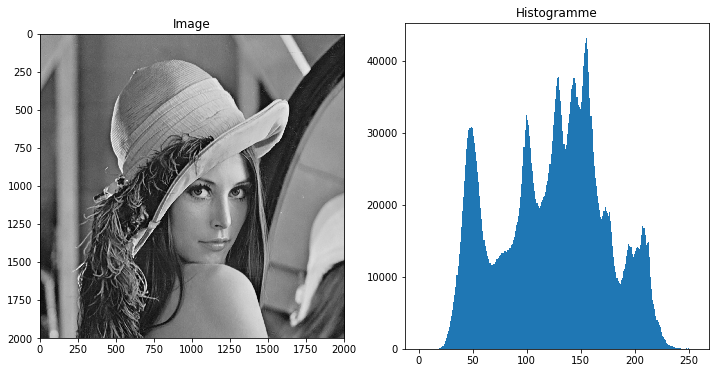

In [4]:
# Affichons l'image chargée et son histogramme:
image_et_histo(img, "gray")

#### Passons à la manipulation:

Pour modifier la luminance d'une image en **niveaux de gris** stockée sous format de matrice (```np.array```), il suffit de modifier la valeur de chaque pixel de la matrice.  
On peut alors ajouter ou retirer une certaine valeur à tous les pixels de l'image, sans discrimination sur leur valeur initiale.

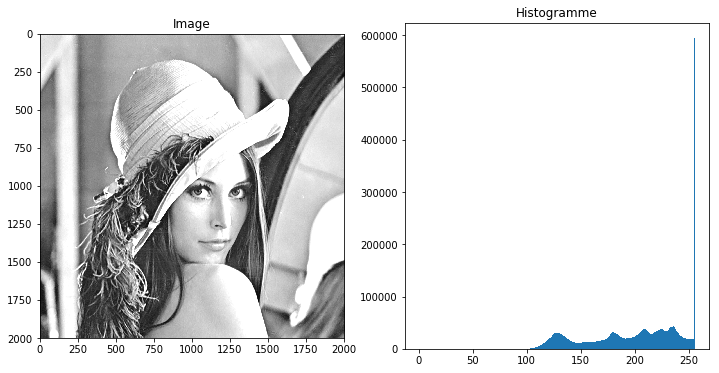

In [5]:
# Ajoutons 80 à tous les pixels de l'image, en vérifiant que la valeur ne va pas excéder les 255

imgL = np.where((255 - img) >= 80, img + 80, 255)
image_et_histo(imgL, "gray")

#### Observations:

**Sur l'image:** 
- Notre image a bien gagné en luminance, mais on a aussi perdu de nombreux détails dans les zones les plus claires.  
- En effet les pixels de l’image d’origine qui avaient une valeur de luminance de 175 ou plus se retrouvent avec une valeur supérieure à 255 après l'ajout de 80.  
- On perd donc en détails dans les hautes luminances à cause de cette opération. On parle d’écrêtage du signal (*clipping*) : les nuances de luminance qui existaient entre 175 et 255 sont perdues à jamais (perte d'information non réversible).

**Sur l'histogramme**: 
- On remarque que plus aucun pixel ne semble avoir une valeur < 80.
- On voit également qu'il y a une majorité de pixels ayant une valeur de 255 (à cause de l'écrêtage du signal mentionné au dessus).
  * C'est à cause de la mise à l'échelle de l'histogramme qu'il apparait applatit : il y a énormément de pixels avec la valeur 255, du coup les autres quantités semblent dérisoires à côté. Pour remédier à ça, on peut retirer la valeur 255 de l'histogramme artificiellement:

Text(0.5,1,'Histogramme après le +80')

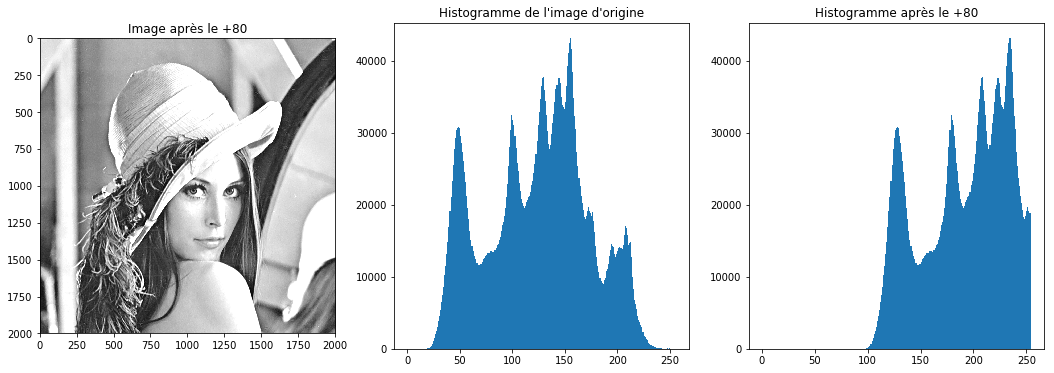

In [91]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(imgL, "gray")
ax.set_title("Image après le +80")
ax = fig.add_subplot(1,3,2)
plt.hist(np.array(img).ravel(), 256, [0,256])
ax.set_title("Histogramme de l'image d'origine")
ax = fig.add_subplot(1,3,3)
plt.hist(np.array(imgL).ravel(), 255, [0,254])
ax.set_title("Histogramme après le +80")

Ici, on voit mieux qui l'histogramme à bien été "poussé" vers la droite (vers les valeurs élevées de luminance), et que tous les pixels avec une valeur de 175 et plus dans l'histogramme d'origine (avant la modification de luminance) ont disparus : ils valent tous 255 maintenant, et ne sont plus affichés sur l'histogramme.  

**Remarque:** En photographie, une image avec un histogramme trop décalé vers là droite est dite sur-exposée : un déséquilibre de contraste du faite que trop de lumière à été captée et peu de détails sont disponibles dans les tons sombres.

Text(0.5,1,'Histogramme après le -80')

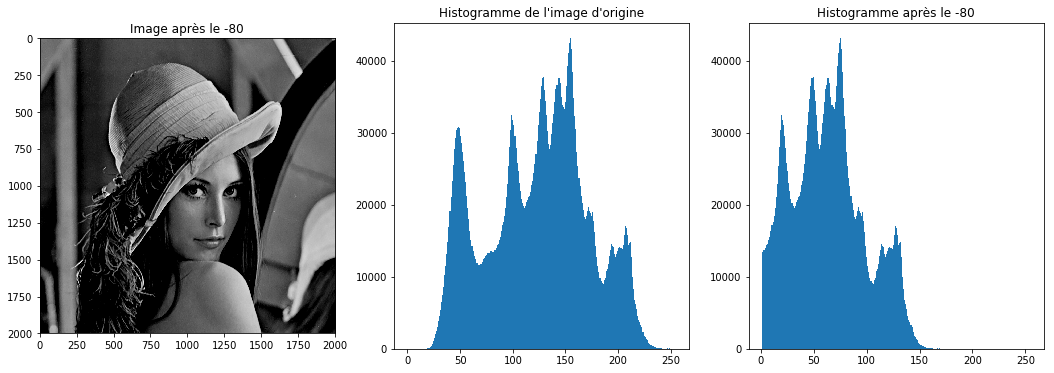

In [92]:
# Retirons 80 à tous les pixels de l'image, en vérifiant que la valeur ne va pas passer sous 0

imgD = np.where(img >= 80, img - 80, 0)

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(imgD, "gray")
ax.set_title("Image après le -80")
ax = fig.add_subplot(1,3,2)
plt.hist(np.array(img).ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image d'origine")
ax = fig.add_subplot(1,3,3)
plt.hist(np.array(imgD).ravel(), 255, [1,255])
ax.set_title("Histogramme après le -80")

Même observations qu'avant, sauf que cette fois-ci l'histogramme à été poussé vers la gauche (valeurs de faible luminance), et que plus aucun pixel n'a de valeur supérieure à 175.

On parle alors d'image sous-exposée.

### I.2.b Via Pillow

Pillow fournit un ensemble de méthodes permettant de manipuler une image aisément : le module ```ImageEnhancer```  
Parmi l'ensemble des méthodes de ce [module](https://pillow.readthedocs.io/en/3.1.x/reference/ImageEnhance.html#PIL.ImageEnhance.Brightness), il y à la classe ```Brightness``` qui permet de manipuler la luminance d'une image chargée avec Pillow.

Elle s'utilise de la manière suivante:
```Python
# On initialise "l'enhancer"
enhancer = ImageEnhance.Brightness(img)
# On applique une augmentation de 30% de luminance
img2 = enhancer.enhance(1.3)
```

#### Sur une image en niveaux de gris :

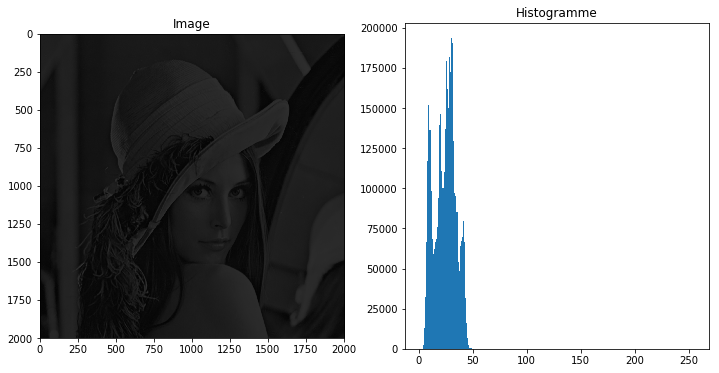

In [7]:
# Exemple en niveaux de gris

from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg').convert('L')

# On créé "l'enhancer" et on applique une réduction de 40% de luminance
img2 = ImageEnhance.Brightness(img).enhance(0.2)

image_et_histo(img2, "gray")

#### Sur une image couleur:

Pillow propose une méthode (```ImageEnhance```) pour modifier la luminance d'une image couleur sans avoir à extraire l'information de luminance des valeurs RGB.

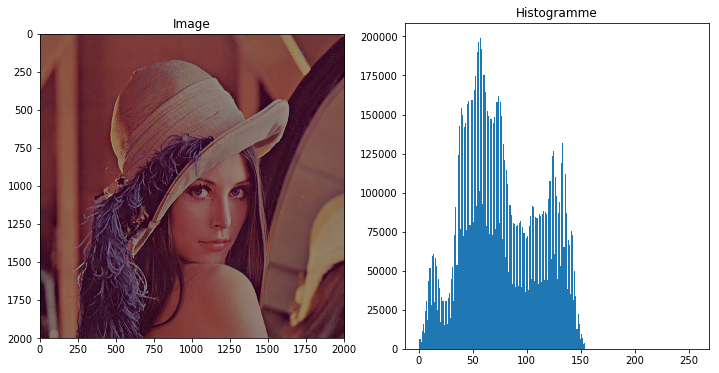

In [72]:
# Exemple

from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg')

# On créé "l'enhancer" et on applique une réduction de 40% de luminosité
img2 = ImageEnhance.Brightness(img).enhance(0.6)

image_et_histo(img2)

## I.3 Modifications de contraste:
***

Le **contraste** est une propriété intrinsèque d'une image qui quantifie la différence de luminosité entre les parties claires et sombres. Cette caractéristique nous donne une idée sur la dispersion de la luminance au sein de l'image : plus les valeurs de luminance des pixels de l'image se ressemblent, plus faible sera le contraste. A contrario, plus la luminance varie dans l'image, plus le contraste sera élevé. 

**Remarque:** C'est un indice de dispersion, au même titre que l'écart type ou la variance indiquent la dispersion des valeurs autour de la moyenne dans une distribution.

#### Cas particuliers :
- Si l'ensemble des pixels ont la même valeur, le contraste sera nul.
- Une image constituée uniquement de pixels noirs et blanc aura un contraste maximal.

#### Une image sur-exposée et sous-exposée auront toutes deux un faible contraste:
- La majeure partie des pixels auront une valeur de luminance élevée pour les images sur-exposées (*high-key*), donc la luminance moyenne sera élevée, et le contraste sera faible.
- La majeure partie des pixels auront une valeur de luminance faible pour les images sous-exposées (*low-key*), donc la luminance moyenne sera faible, et le contraste sera faible.

Faible contraste:  
<img src="img/illustrations/cray_low.jpg" width="340">
<img src="img/illustrations/liz_low.jpg" width="300">

Fort contraste:  
<img src="img/illustrations/cray_high.jpg" width="340">
<img src="img/illustrations/liz_high.jpg" width="300">


#### Au niveau de l'histogramme, le contraste se traduira par:
- Un histogramme (de luminance) peu dispersé (centré autour de la valeur moyenne de luminance) pour les images à faible contraste: pas de grandes variations dans la luminance.
- Un histogramme plus étendu / dispersé pour les images à fort contraste.   

 <img src="img/Illustrations/Hist5.png">

#### Modifications de contraste:  
**Modifier le contraste** d'une image consiste donc à modifier (augmenter ou réduire) les écarts de luminance entre les pixels.  
Par exemple, accentuer les différences de luminance en rendant les pixels sombres plus sombres et les pixels clairs plus clairs augmentera le contraste.

### I.3.a Seuillage (binariser une image):

**Seuiller** une image (*thresholding*) consiste à discrétiser l'échelle des valeurs de luminance de ses pixels selon un seuil donné.

Pour ce faire, il faut définir un seuil: valeur de luminance (intensité) selon laquelle l'image va être **binarisée**.
- Tout pixel avec une valeure supérieure au seuil deviendra 255 (blanc)
- Tout pixel avec une valeure inférieure au seuil deviendra 0 (noir)

#### Seuillage par opérations matricielles:

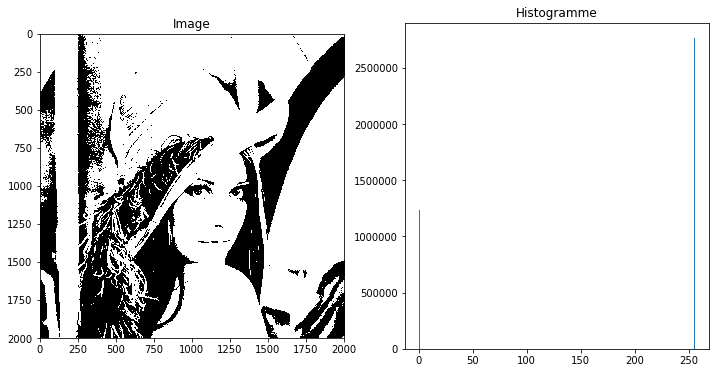

In [119]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def image_et_histo(img, cmap="viridis"):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img, cmap)
    ax.set_title("Image")
    ax = fig.add_subplot(1,2,2)
    plt.hist(np.array(img).ravel(), 256, [0,256])
    ax.set_title("Histogramme")

img = np.array(Image.open('img/lena.jpg').convert('L'))

# On spécifie le seuil à 100: toutes les valeurs >= 100 vont valoir 255 après, et celles inférieures 0
imgBin = np.where(img >= 100, 255, 0)

image_et_histo(binaire, "gray")

#### Avec OpenCV:

```Python
imageBinaire = cv2.inRange(image, seuil, nouvelle_valeur)
```

**Avec:**
- ```image```: l'image source  
- ```seuil```: seuil de binarisation
- ```nouvelle_valeur```: nouvelle valeur que vont prendre les pixels

In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def image_et_histo(img, cmap="viridis"):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img, cmap)
    ax.set_title("Image")
    ax = fig.add_subplot(1,2,2)
    plt.hist(np.array(img).ravel(), 256, [0,256])
    ax.set_title("Histogramme")

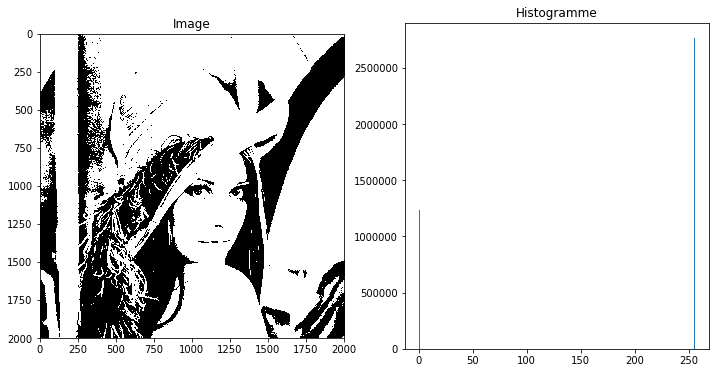

In [111]:
img = cv2.imread("img/lena.jpg", 0)

# On binarise
binaire = cv2.inRange(img, 100, 255)

image_et_histo(binaire, "gray")

#### **[Exercice]** A vous de jouer:
1. Changez la valeur du seuil et observez les changements

In [117]:
# > Emplacement exercice <


#### Binariser une image couleur:

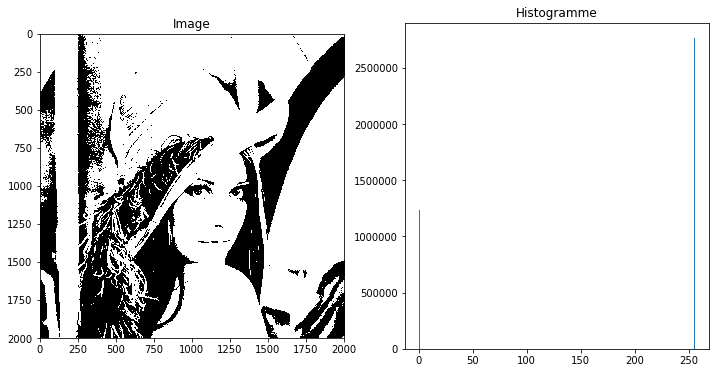

In [139]:
# Pour une image RGB, il faudra indiquer un seuil pour chaque canal

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def image_et_histo(img, cmap="viridis"):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img, cmap)
    ax.set_title("Image")
    ax = fig.add_subplot(1,2,2)
    plt.hist(np.array(img).ravel(), 256, [0,256])
    ax.set_title("Histogramme")

img = cv2.imread("img/lena.jpg", 1)

rgb_filtered = cv2.inRange(img, (100, 100, 100), (255, 255, 255))

image_et_histo(binaire, "gray")

### I.3.b Réhaussement et rabaissement de contraste:

Text(0.5,1,"Histogramme de l'image réhaussée")

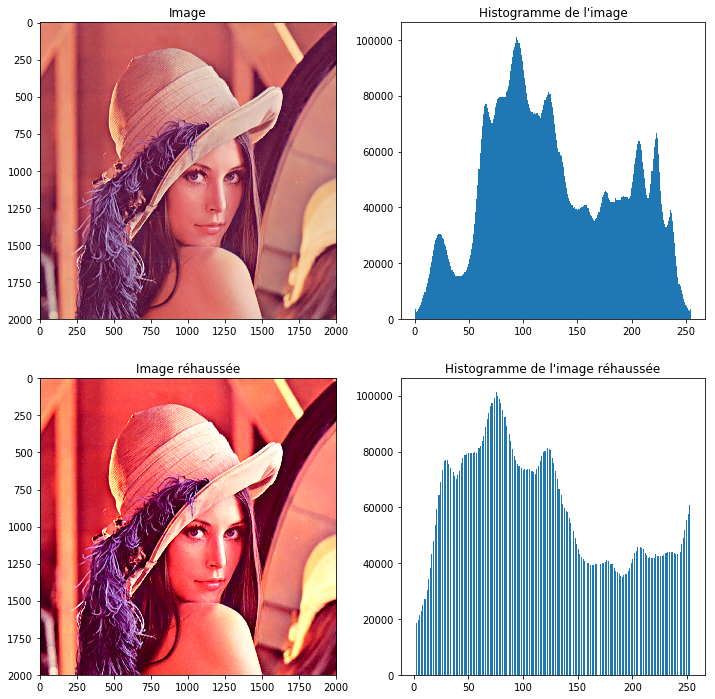

In [172]:
# Avec le module ImageEnhance de Pillow

from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg')

# On créé "l'enhancer" et on applique un rehaussement de 60% de contraste
img2 = ImageEnhance.Contrast(img).enhance(1.6)

# Affichons le résultat
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2,2,1)
plt.imshow(img)
ax.set_title("Image")
ax = fig.add_subplot(2,2,2)
plt.hist(np.array(img).ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image")

ax = fig.add_subplot(2,2,3)
plt.imshow(img2)
ax.set_title("Image réhaussée")
ax = fig.add_subplot(2,2,4)
plt.hist(np.array(img2).ravel(), 256, [1,254])
ax.set_title("Histogramme de l'image réhaussée")

### I.3.c Egalisation d'Histogramme :

**L'égalisation de l'histograme**  est une méthode de normalisation de l'intensité (luminance): l'on va modifier la luminance de chaque pixel de l'image de sorte à ce que toutes les valeurs de luminance soient présentes en quantités relativement équivalentes.

L’objectif de l’égalisation d’histogramme est de faire en l'histogramme après égalisation soit le plus plat possible.

Cette méthode permet d'augmenter le contraste d'une image dont les valeurs de luminance sont peu dispersées (faible contraste) en "étirant" l'histogramme.

#### Image en niveaux de gris:

Text(0.5,1,"Histogramme de l'image egalisée")

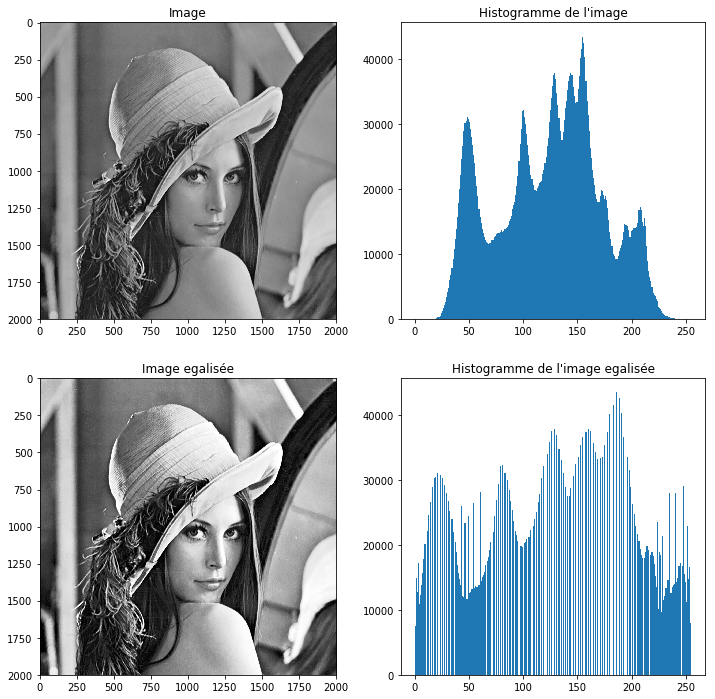

In [168]:
# Avec OpenCV

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/lena.jpg", 0)

equ = cv2.equalizeHist(img)

# Affichons le résultat
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2,2,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(2,2,2)
plt.hist(img.ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image")

ax = fig.add_subplot(2,2,3)
plt.imshow(equ, "gray")
ax.set_title("Image egalisée")
ax = fig.add_subplot(2,2,4)
plt.hist(equ.ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image egalisée")

On peut voir que l'histogramme est plus étendu après l'égalisation, comme si il avait été étiré : le contraste à été amélioré. Les zones sombres sont devenues plus sombres, et les zones claires plus claires.

**Remarque:** Cependant, notre image d'origine avait un assez bon contraste, du coup l'effet sur l'image elle-même n'est pas si flagrant.

#### **[Exercice]** A vous de jouer: 
1. Choisissez une image et changez sa luminance en la sur-exposant.
2. Egalisez-là et comparez les histogrammes.

In [129]:
# > Emplacement exercice <


#### Images en couleur:

Egaliser une image en couleur avec OpenCV demande de d'abord transformer l'image au format ```YUV```, un autre espace colorimétrique :
- Y est la composante dite de "luma" (luminance)
- U et V dont les composants de la chrominance

Text(0.5,1,"Histogramme de l'image egalisée")

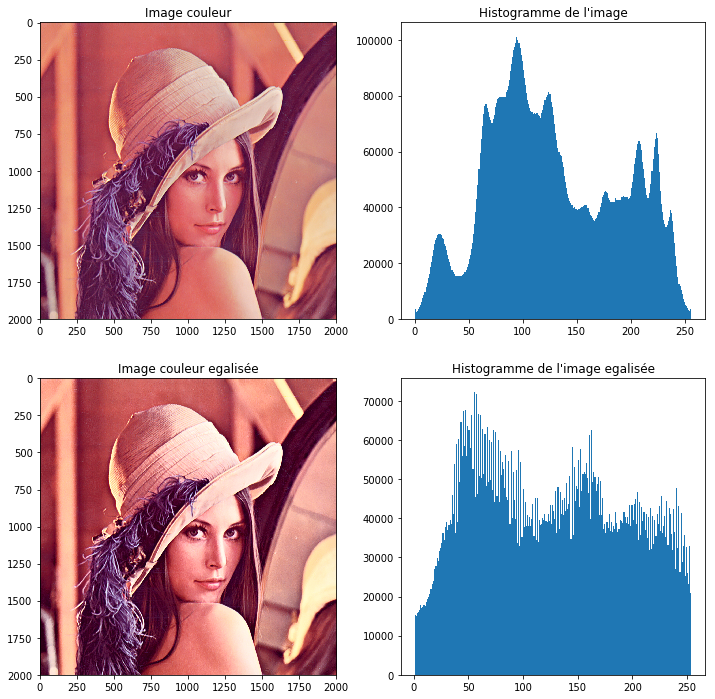

In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/lena.jpg", 1)

# Conversion en YUV
img_to_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# On egalise le canal Y uniquement
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])

# On passe le résultat en RGB
equ = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2RGB)

# Affichons le résultat
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_title("Image couleur")
ax = fig.add_subplot(2,2,2)
plt.hist(img.ravel(), 256, [0,256])
ax.set_title("Histogramme de l'image")

ax = fig.add_subplot(2,2,3)
plt.imshow(equ)
ax.set_title("Image couleur egalisée")
ax = fig.add_subplot(2,2,4)
plt.hist(equ.ravel(), 254, [1,254])
ax.set_title("Histogramme de l'image egalisée")

#### Avec le module ImageOps de Pillow:

Text(0.5,1,"Histogramme de l'image egalisée")

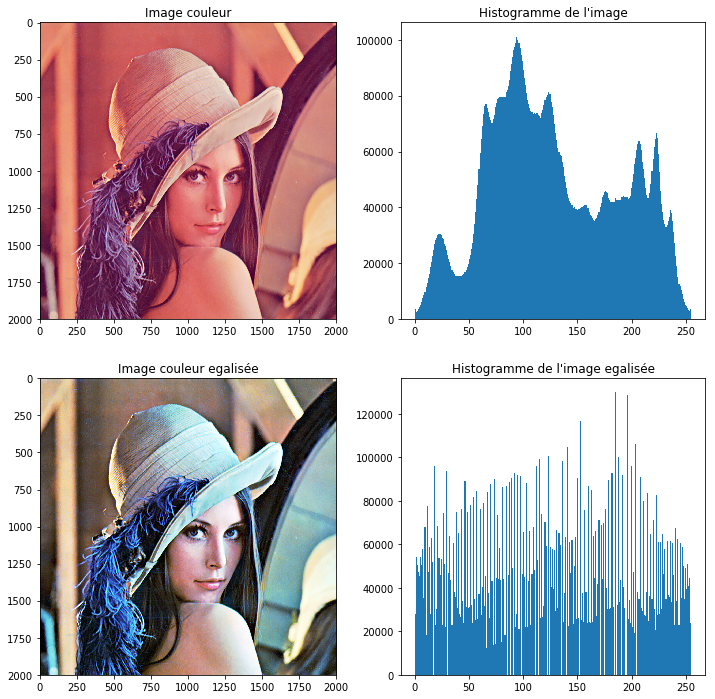

In [177]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg')

# On égalise
equ = ImageOps.equalize(img)

# On converti les images en matrices
img = np.array(img)
equ = np.array(equ)

# On affiche
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2,2,1)
plt.imshow(img)
ax.set_title("Image couleur")
ax = fig.add_subplot(2,2,2)
plt.hist(img.ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image")

ax = fig.add_subplot(2,2,3)
plt.imshow(equ)
ax.set_title("Image couleur egalisée")
ax = fig.add_subplot(2,2,4)
plt.hist(equ.ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image egalisée")

***
# II. Operations morphologiques et filtrage
***

Dans cette dernière section, nous allons voir un certains nombres d'opérations de traitement d'image un peu plus avancées, permettant d'altérer la forme des objets d'une image, et pas seulement leur luminance.

**Plan:**
1. Degradation d'images: 
    * Flou
    * Bruit
2. Restoration d'images: 
    * De-bruitage
    * Erosions
    * Dilatations
3. Exercice final : comptage de pièces

## II.1 Degradations d'images
***

### II.1.a Flou

L'on peut flouter une image en y appliquant un **filtre Gaussien.**

Un **filtre** représente une opération mathématique sur un signal (ou une image) qui vise à enlever du bruit (parasite) ou de sélectionner certaines fréquences du signal.

**Remarques:**
- Un filtre appliqué à une image est généralement appelé une opération de **convolution**.
- Le fonctionnement des filtres (et des convolutions), qui sont une des bases du traitement d'image, est hors du champ de ce cours. Si vous voulez en savoir plus : http://setosa.io/ev/image-kernels/

Les méthodes de floutage:

**Avec Scipy:**  
```Python
imgBlur = filters.gaussian_filter(img, 10)
```

**Avec Pillow:**
```Python
imgBlur = img.filter(ImageFilter.GaussianBlur(10))
```

Ces deux méthodes ne prennent qu'un seul paramètre: la taille du filtre Gaussien.

#### Pour une image en **niveaux de gris:**

Text(0.5,1,'Histogramme')

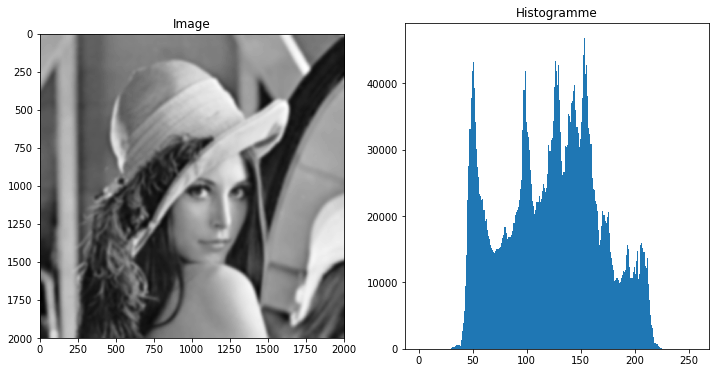

In [183]:
# Avec Scipy:

from PIL import Image
import numpy as np
from scipy.ndimage import filters
import matplotlib.pyplot as plt
%matplotlib inline

img = np.array(Image.open('img/lena.jpg').convert('L'))

# On filtre
imgBlur = filters.gaussian_filter(img, 10)

# On affiche
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2,1)
plt.imshow(imgBlur, "gray")
ax.set_title("Image")
ax = fig.add_subplot(1,2,2)
plt.hist(np.array(imgBlur).ravel(), 256, [0,256])
ax.set_title("Histogramme")

Text(0.5,1,'Histogramme')

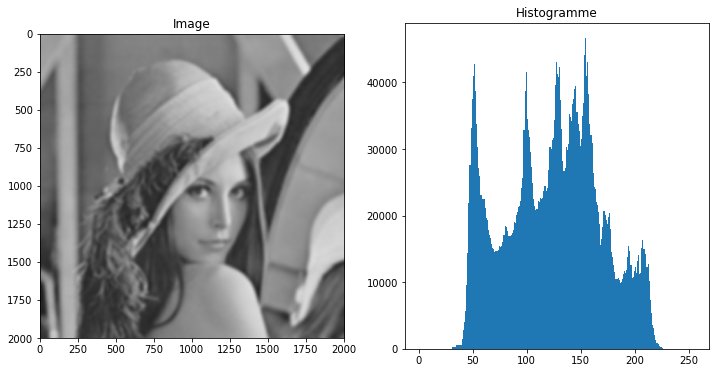

In [186]:
# Avec Pillow:

from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg').convert('L')

# On filtre
imgBlur = img.filter(ImageFilter.GaussianBlur(10))

# On affiche
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2,1)
plt.imshow(imgBlur, "gray")
ax.set_title("Image")
ax = fig.add_subplot(1,2,2)
plt.hist(np.array(imgBlur).ravel(), 256, [0,256])
ax.set_title("Histogramme")

#### Pour une image en **couleur:**

Text(0.5,1,"Histogramme de l'image egalisée")

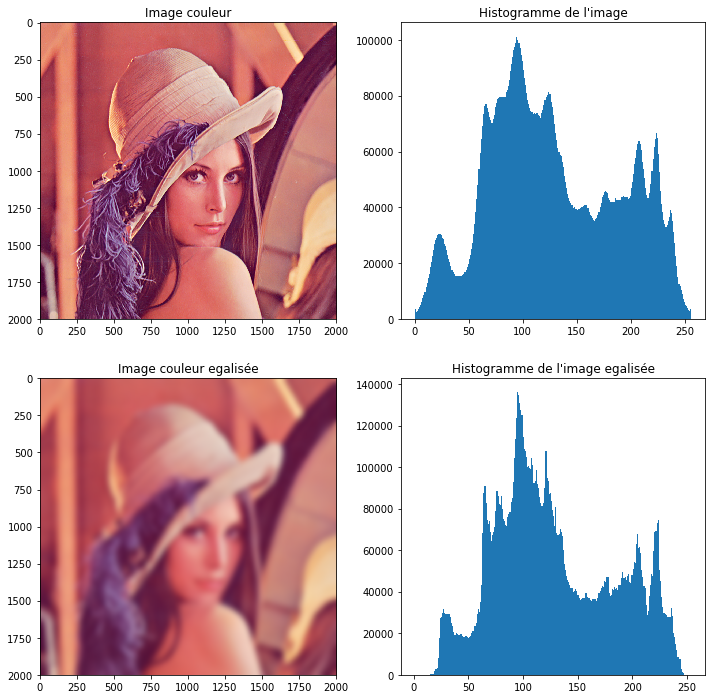

In [189]:
# Avec Pillow:

from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg')

# On filtre
imgBlur = img.filter(ImageFilter.GaussianBlur(20))

# On affiche
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2,2,1)
plt.imshow(img)
ax.set_title("Image couleur")
ax = fig.add_subplot(2,2,2)
plt.hist(np.array(img).ravel(), 256, [0,256])
ax.set_title("Histogramme de l'image")

ax = fig.add_subplot(2,2,3)
plt.imshow(imgBlur)
ax.set_title("Image couleur egalisée")
ax = fig.add_subplot(2,2,4)
plt.hist(np.array(imgBlur).ravel(), 254, [1,254])
ax.set_title("Histogramme de l'image egalisée")

**[Exercice]** A vous de jouer:
1. Chargez une nouvelle image
2. Modifiez la valeur de la taille du filtre Gaussien et observez le résultat.

In [178]:
# > Emplacement exercice <


### II.1.b Ajout de bruit:

En traitement du signal (et donc par extension, des images), le **bruit** fait référence à des variations aléatoires et "non-voulues" du signal, donc de la luminance ou couleur des pixels.

Ce bruit est donc une dégradation de l'image (par rapport à un état d'origine, ou un état optimal espéré), et peut naturellement provenir de plusieurs sources possibles, telles que de mauvais capteurs, une trop faible luminosité lors de la prise de l'image, des problèmes d'électronique, dégradation du support de stockage de l'image avec le temps, ...

Ajouter du bruit à une image revient donc à remplacer certains pixels par des valeurs aléatoires.

Text(0.5,1,"Histogramme de l'image bruitée")

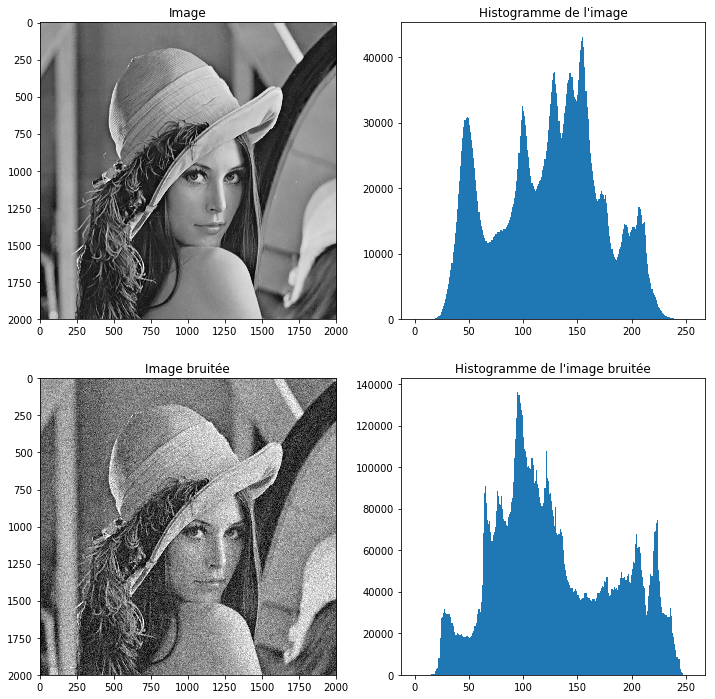

In [199]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = np.array(Image.open('img/lena.jpg').convert("L"))

# Ajoutons un bruit Gaussien (normal) de moyenne 0 et variance 20
mean = 0.0
std = 20.0
noisy_img = img + np.random.normal(mean, std, img.shape)
noisy_img_clipped = np.clip(noisy_img, 0, 255) 

# On affiche
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2,2,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(2,2,2)
plt.hist(np.array(img).ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image")

ax = fig.add_subplot(2,2,3)
plt.imshow(noisy_img_clipped, "gray")
ax.set_title("Image bruitée")
ax = fig.add_subplot(2,2,4)
plt.hist(np.array(imgBlur).ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image bruitée")

**Remarque:** D'autres types de bruits peuvent être ajoutés: Salt & Pepper, Poisson, Speckle, ...

Pour aller plus loin : http://www.xiaoliangbai.com/2016/09/09/more-on-image-noise-generation

**[Exercice]** A vous de jouer:
1. Chargez une nouvelle image.
2. Appliquez-lui du bruit gaussien.
3. Changez la valeur du bruit Gaussien (moyenne et variance) et observez.

In [198]:
# > Emplacement exercice <


## II.2 Restoration d'images :
***

La **restauration d'image** est un ensemble de techniques qui permettent de rendre à une image l'apparence de son état d'origine.

Illustration:  
<img src="https://storage.googleapis.com/pagina-personal.appspot.com/img_blog/dual_rof_denoising/gradient_descent_dual_rof.png" heigth="400">

L'objectif général de ces méthodes est de retrouver une image nette à partir d'une image bruitée, ce qui nécessite de deviner au mieux la valeur des pixels bruités en fonction de celles des pixels alentours.

### II.2.a Dé-bruitage :

Retirer le bruit d'une image est une des opérations les plus communes en restoration d'image: il s'agit (1) d'estimer quels pixels sont bruités et (2) de trouver la meilleure valeur pour ces pixels sur la base de leurs voisins.

Illustrations:  
<img src="img/illustrations/noise1.gif" height="300">

**Avec OpenCV:**
```Python
imgDenoised = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)
```
Qui se base sur l'algorithme *Non-local Means Denoising*

**Avec:**
- ```h```: la puissance du filtre (une valeur autour de 10 donnera de bons résultats)
- ```templateWindowSize``` et ```searchWindowSize``` : deux paramètres de la taille du filtre. Doivent avoir des valeurs impaires.

#### Pour une image en noir et blanc:

Text(0.5,1,'Image débruitée')

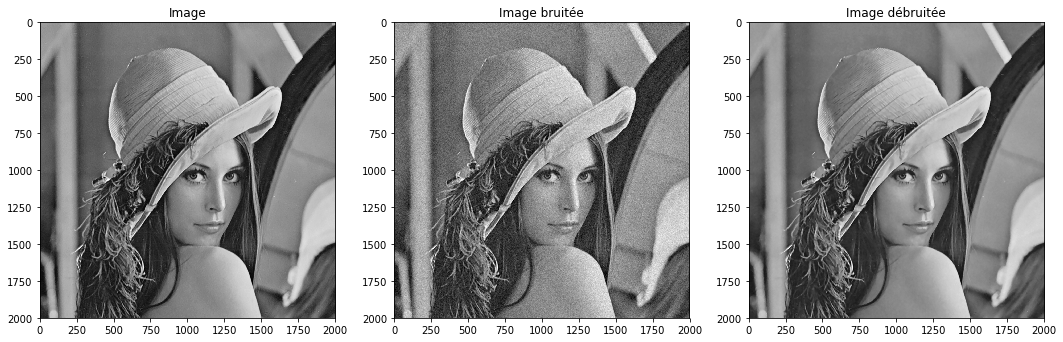

In [2]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = np.array(Image.open('img/lena.jpg').convert("L"))

# Ajoutons un bruit Gaussien (normal) de moyenne 0 et variance 20
mean = 0.0
std = 10.0
noisy_img = img + np.random.normal(mean, std, img.shape)
noisy_img_clipped = np.array(np.clip(noisy_img, 0, 255), dtype='uint8')

# Essayons de la débruiter
denoised = cv2.fastNlMeansDenoising(noisy_img_clipped, None, 10, 9, 13)

# On affiche
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(1,3,2)
plt.imshow(noisy_img_clipped, "gray")
ax.set_title("Image bruitée")
ax = fig.add_subplot(1,3,3)
plt.imshow(denoised, "gray")
ax.set_title("Image débruitée")

#### Pour une image en couleur:

**Avec OpenCV:**
```Python
imgDenoised = cv2.fastNlMeansDenoisingColored(image, None, h, hColor, templateWindowSize, searchWindowSize)
```

Le seul paramètre qui change est hColor, auquel on donne typiquement la même valeur que h.

Text(0.5,1,'Image débruitée')

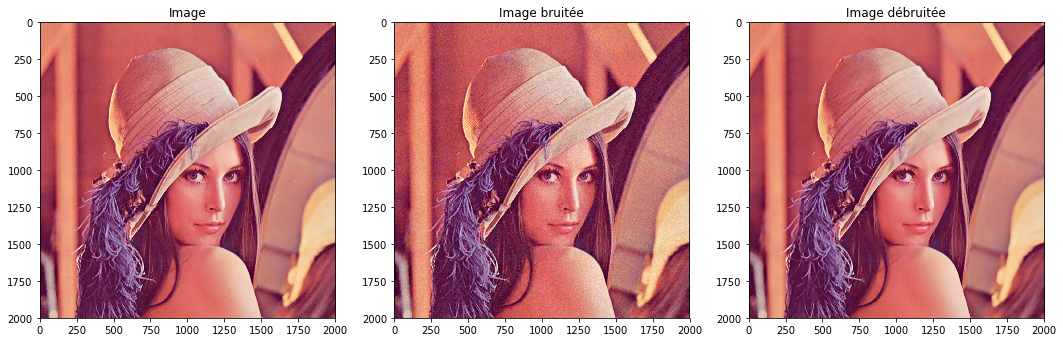

In [222]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = np.array(Image.open('img/lena.jpg'))

# Ajoutons un bruit Gaussien (normal) de moyenne 0 et variance 20
mean = 0.0
std = 10.0
noisy_img = img + np.random.normal(mean, std, img.shape)
noisy_img_clipped = np.array(np.clip(noisy_img, 0, 255), dtype='uint8')

# Essayons de la débruiter
denoised = cv2.fastNlMeansDenoisingColored(noisy_img_clipped, None, 10, 10, 9, 13)

# On affiche
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(img)
ax.set_title("Image")
ax = fig.add_subplot(1,3,2)
plt.imshow(noisy_img_clipped)
ax.set_title("Image bruitée")
ax = fig.add_subplot(1,3,3)
plt.imshow(denoised, "gray")
ax.set_title("Image débruitée")

**[Exercice]** A vous de jouer:
1. Chargez une nouvelle image.
2. Appliquez-lui du bruit gaussien.
3. Changez la quantité de bruit ainsi que la valeur de la puissance du filtre (h et hColor) et observez.

In [219]:
# > Emplacement exercice <


### II.2.b Erosions :

Une **érosion** est une opération de **morphologie mathématique** qui permet, à partir d'une image binaire (ou en niveaux de gris) et d'un **élément structurant** (un motif), de produire une nouvelle image ou les pixels restants sont ceux qui correspondent à la fois à l'image d'origine et à l'élément structurant.
- La **morphologie mathématique** (ou morphologie) fait référence à une collection de méthodes de traitement d'image pour analyser et modifier des formes spatiales simples, généralement sur des images en noir et blanc.

Cette opérations permet d'éliminer des pixels en spécifiant des conditions sur leur agencement dans l'espace (2D), via un élément structurant.
- Un élément structurant est typiquement une petite image en noir et blanc de 3x3 ou 5x5 pixels, qui représentent un certain motif, un prototype de forme géométrique que l'on aimerait faire ressortir de l'image.

Illustration:  
<img src="img/illustrations/erosion.gif" width="400">

Sur cette animation, le motif qui se déplace est l'élément structurant: une image de 3x3 avec des pixels pleins (en croix) et vides. Ce motif va être déplacé sur l'ensemble de l'image, et va éliminer (valeur à 0 ou 255 selon les paramètres) tous les pixels des régions ou le motif ne corresponds pas totalement au motif présenté.

Exemples d'éléments structurants:  
<img src="img/es/T.png" width="200">
<img src="img/es/Y.png" width="200">

L'opération d'érosion permet donc de faire ressortir certains motifs en éliminant tout ce qui n'y correspond pas, ou encore de retirer des pixels non-voulus autour d'une forme que l'on veut conserver.
- Typiquement, une érosion va "éroder" l'image: beaucoup de pixels vont disparaitre !
- Vu que les pixels au bord des objets ne vont généralement pas correspondre à l'élément structurant, cette opération aura tendance à ronger les bordures.

#### Avec OpenCV:

```Python
imgEroded = cv2.erode(img, element_structurant, iterations)
```
L'élément structurant doit être une matrice, ou une image chargée en tant que matrice.

Text(0.5,1,'Image erodée')

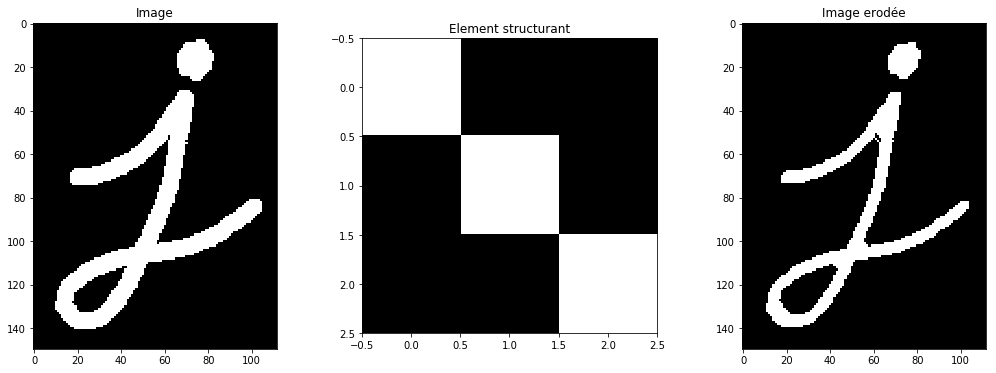

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('img/j.png', 0)

# On binarise l'image
img = cv2.inRange(img, 100, 255)

# On créé l'élément structurant
es = np.array([[1,0,0], [0,1,0], [0,0,1]], dtype="uint8")

# On érode
eroded = cv2.erode(img, es, iterations=1)

# On affiche
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(1,3,2)
plt.imshow(es, "gray")
ax.set_title("Element structurant")
ax = fig.add_subplot(1,3,3)
plt.imshow(eroded, "gray")
ax.set_title("Image erodée")

Text(0.5,1,'Image erodée')

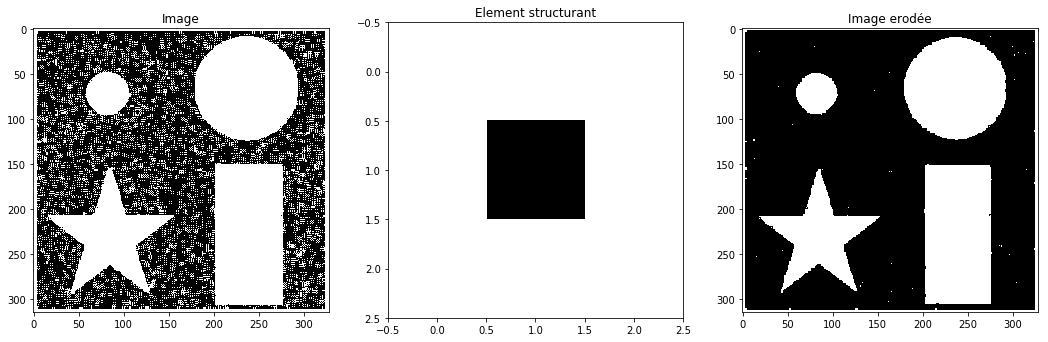

In [53]:
# Exemple 2 

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('img/shapes.jpg', 0)

# On binarise l'image
img = cv2.inRange(img, 100, 255)

# On créé l'élément structurant
es = np.array([[1,1,1], [1,0,1], [1,1,1]], dtype="uint8")

# On érode
eroded = cv2.erode(img, es, iterations=1)

# On affiche
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(1,3,2)
plt.imshow(es, "gray")
ax.set_title("Element structurant")
ax = fig.add_subplot(1,3,3)
plt.imshow(eroded, "gray")
ax.set_title("Image erodée")

**[Exercice]** A vous de jouer:
1. Avec l'image du J, changez le type d'élément structurant et observez le résultat de l'érosion.

In [54]:
# > Emplacement exercice <


### II.2.c Dilatations :

Une dilatation est l'opération inverse de l'érosion.

<img src="img/illustrations/dilatation.jpg" width="400">

Généralement, dans le cas d'opérations de restoration d'images, une érosion sera suivie d'une dilatation. En effet, l'érosion va éliminer le bruit non voulu, mais va également éroder les bords des objets que l'on veut conserver. Une dilatation va donc permettre de restaurer les bords rongés de l'image, mais ne restaurera pas le bruit, qui lui à totalement disparu.

#### Avec OpenCV:
```Python
imgEroded = cv2.dilate(img, element_structurant, iterations)
```

Text(0.5,1,'Image dilatée')

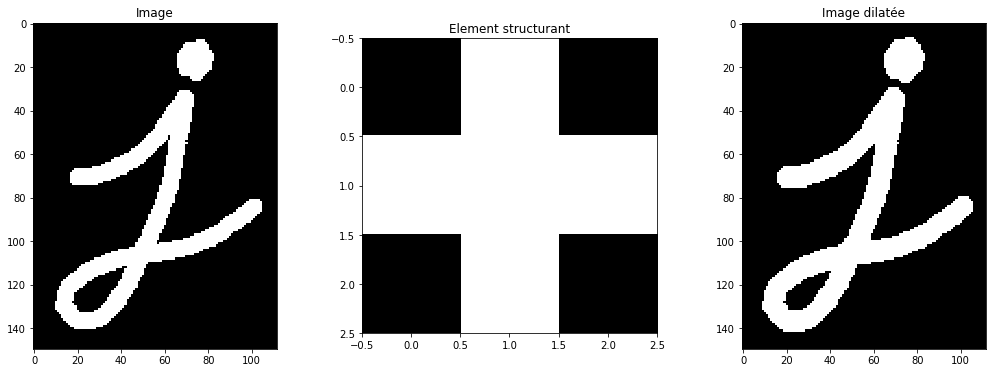

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('img/j.png', 0)

# On binarise l'image
img = cv2.inRange(img, 100, 255)

# On créé l'élément structurant
es = np.array([[0,1,0], [1,1,1], [0,1,0]], dtype="uint8")

# On érode
eroded = cv2.dilate(img, es, iterations=1)

# On affiche
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(1,3,2)
plt.imshow(es, "gray")
ax.set_title("Element structurant")
ax = fig.add_subplot(1,3,3)
plt.imshow(eroded, "gray")
ax.set_title("Image dilatée")

Text(0.5,1,'Image dilatée')

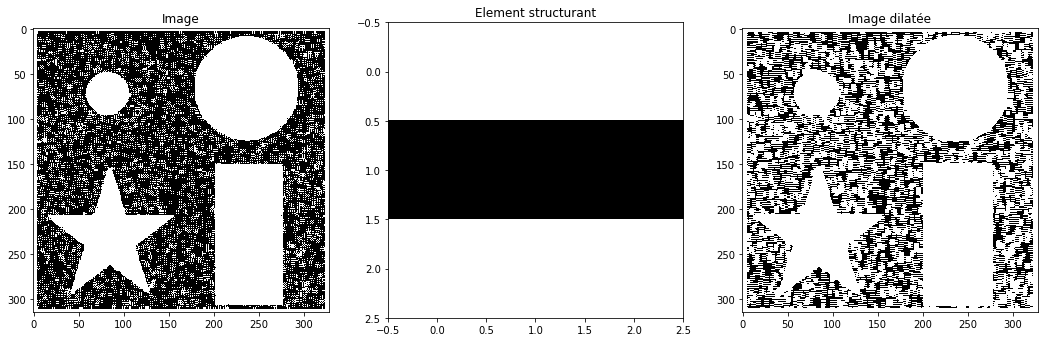

In [5]:
# Exemple 2 

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('img/shapes.jpg', 0)

# On binarise l'image
img = cv2.inRange(img, 100, 255)

# On créé l'élément structurant
es = np.array([[1,1,1], [0,0,0], [1,1,1]], dtype="uint8")

# On érode
eroded = cv2.dilate(img, es, iterations=1)

# On affiche
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(img, "gray")
ax.set_title("Image")
ax = fig.add_subplot(1,3,2)
plt.imshow(es, "gray")
ax.set_title("Element structurant")
ax = fig.add_subplot(1,3,3)
plt.imshow(eroded, "gray")
ax.set_title("Image dilatée")

**[Exercice]** A vous de jouer:
1. A l'image "j.png", ajoutez un bruit gaussien.
2. Procédez à une érosion avec l'élément structurant de votre choix.
2. Répétez l'opération en changeant le nombre d'itérations de 1 à 5.
3. Procédez ensuite à une dilatation avec le même élément strucutrant.
    * **Remarque:** Une érosion avec un élément structurant B suivie d'une dilatation avec B est appelé une **ouverture**. Le processus inverse est une **fermeture**.
4. Répétez l'opération d'ouverture sur l'image "shapes.jpg" de sorte à la nettoyer (restorer) proprement.

***
# Fin du TP2
***